In [8]:
!mkdir -p ~/ .kaggle

In [14]:
!cp -r kaggle.json ~/.kaggle/

In [15]:
!chmod 600 ~/ /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [43]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

In [20]:
from tensorflow.keras.preprocessing import image

In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [33]:
import numpy as np

In [24]:
model=VGG16(weights="imagenet")

553467096/553467096 [==============================] - 25s 0us/step


In [26]:
img_path = "/content/dog_img.jpg"

In [27]:
img = image.load_img(img_path,target_size =(224,224))

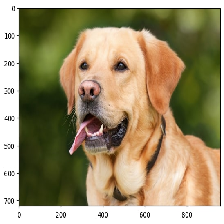

In [28]:
img

In [29]:
img = image.img_to_array(img)

In [30]:
img.shape

(224, 224, 3)

In [34]:
img = np.expand_dims(img,axis=0)

In [35]:
img.shape

(1, 224, 224, 3)

In [37]:
model.predict(img)

1/1 [==============================] - 8s 8s/step


array([[6.75727252e-10, 9.23204513e-10, 8.36837544e-10, 3.83547444e-10,
        7.80186526e-10, 8.93332697e-09, 1.83803930e-10, 3.76636722e-09,
        7.01602332e-09, 1.70882225e-10, 6.01349359e-10, 1.31952449e-09,
        2.34211694e-09, 1.86572846e-09, 2.86341617e-09, 1.23800428e-10,
        6.86402435e-10, 1.54417201e-10, 3.04753695e-10, 2.41286102e-10,
        8.57933502e-10, 1.51246127e-09, 1.06721572e-07, 3.90102777e-08,
        6.49736762e-07, 2.78089135e-10, 2.32243735e-09, 2.76782219e-09,
        2.56188681e-10, 1.24300847e-10, 2.70649926e-11, 2.36902331e-10,
        4.91977431e-11, 1.07911524e-09, 1.14543919e-09, 6.19508472e-11,
        9.17219523e-10, 2.39522596e-10, 8.11536394e-10, 4.91553953e-09,
        5.57696500e-10, 1.18758559e-10, 1.36618314e-10, 1.36075895e-09,
        1.18313165e-10, 3.32111894e-10, 1.80876414e-09, 4.79727769e-09,
        1.10638041e-08, 1.38164938e-10, 5.14625342e-10, 7.84782195e-09,
        2.36832748e-10, 1.11370940e-10, 2.28955022e-10, 1.228367

In [39]:
prediction = model.predict(img)

1/1 [==============================] - 0s 19ms/step


In [40]:
decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.33524147),
  ('n02104029', 'kuvasz', 0.2627163),
  ('n02101556', 'clumber', 0.17503783),
  ('n02109047', 'Great_Dane', 0.07680245),
  ('n02092339', 'Weimaraner', 0.062204693)]]

In [44]:
model2=ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 5s 0us/step


In [46]:
img = preprocess_input(img)

In [47]:
prediction = model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [48]:
decode_predictions(prediction)

[[('n02099601', 'golden_retriever', 0.6270245),
  ('n02099712', 'Labrador_retriever', 0.3373272),
  ('n02108551', 'Tibetan_mastiff', 0.022430789),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.008951841),
  ('n02104029', 'kuvasz', 0.0015266119)]]

#Fine Tunning of the pre train model

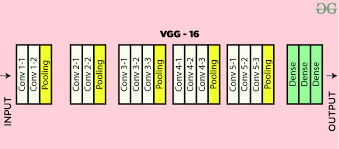

In [49]:
conv_base = VGG16(weights="imagenet",
                  include_top = False,
                  input_shape=(150,150,3))

58889256/58889256 [==============================] - 4s 0us/step


In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [55]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
conv_base.trainable = False

In [58]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [59]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train/",
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test/",
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [60]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [62]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)


Epoch 1/2
625/625 [==============================] - 69s 102ms/step - loss: 0.2642 - accuracy: 0.8864 - val_loss: 0.2334 - val_accuracy: 0.9000
Epoch 2/2
625/625 [==============================] - 54s 85ms/step - loss: 0.1849 - accuracy: 0.9238 - val_loss: 0.2505 - val_accuracy: 0.8926


In [63]:
conv_base.layers

In [64]:
len(conv_base.layers)

19

In [67]:
for layer in conv_base.layers:
  print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [69]:
conv_base.trainable = True

set_trainable = False


for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [71]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [75]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)


Epoch 1/2
625/625 [==============================] - 78s 118ms/step - loss: 0.7297 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/2
625/625 [==============================] - 64s 102ms/step - loss: 0.6932 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5000
